# 6. 의사결정나무(Decision Tree)

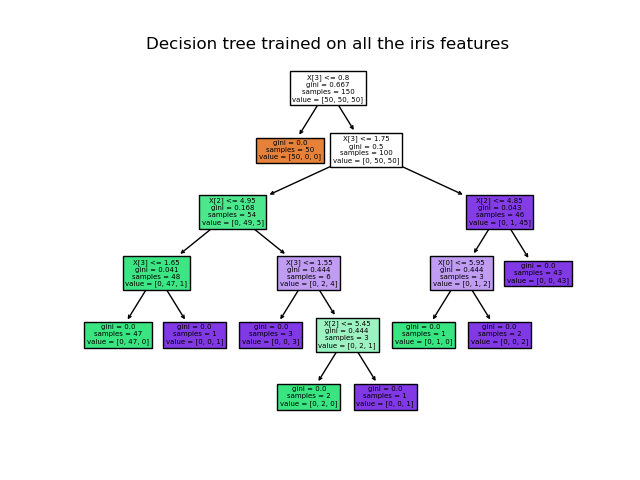

## 1) 의사결정나무란?
* 의사결정나무는 자료를 학습하여 특정 분리 규칙을 찾아내고 그에 따라 몇 개의 소집단으로 분류하는 분석 방법
* 상위 노드에서부터 하위 노드로 분류하는 과정이 나무가지와 유사한 구조로 나타
나며， 의사결정이 진행되는 방식을 한눈에 볼 수 있다.

## 2) 의사결정나무의 특징 ***

### (1) 장점
* 모델이 직관적이고 해석이 용이하다.
* 데이터 정규화 및 단위 변환이 필요하지 않다.
* 다른 기법에 비해 전처리 작업이 어렵지 않다.
* 이산형 변수，연속형 변수 모두에 적용 가능하다.
* 데이터의 선형성，정규성 등의 가정이 불필요하다
* 이상값에 민감하지 않다.

### (2)단점
* 독립변수들 사이의 중요도를 판단하기 쉽지 않다.
* 분류 경계선 근처의 자료에 대해 오차가 크다.
* 과적합 발생 가능성이 높다.

## 3) 의사결정나무의 분석 과정 ***

### (1) 성장
* 성장단계: 분석 목적과 자료 구조에 따라 적절한 **분리기준**과 **정지규칙**을 설정해 의사결정나무를 성장시키는 단계
* 각 마디에서 최적의 분리 규칙을 찾아 의사결정나무를 형성하고 적절한 정
지 규칙을 만족하면 나무의 성장을 중단
* 최적의 분할은 **불순도 감소량**을 가장 크게 하는 분할이다.


### (2) **분리기준: 불순도 감소**

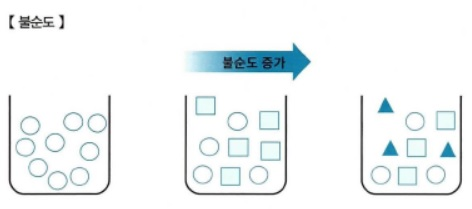

불순도가 높은 상태에서 불순도가 낮아지도록 데이터를 분류

#### A. 종속변수가 이산형 / 범주형 일 때 (분류트리) - 분류분석
* 이산형 변수(10, 20, 30 같은 단위로 끊어지는 숫자)
* 범주형 변수([남자, 여자], [구매, 구매안함])

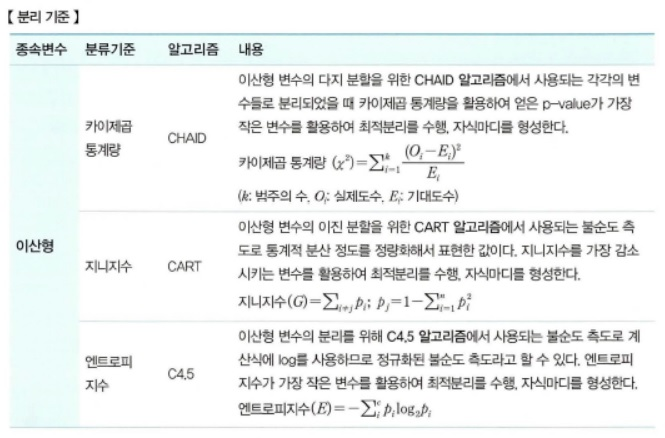

#### B. 연속형(회귀트리) - 예측분석

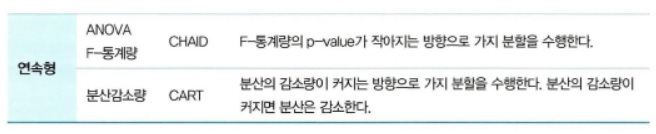

### (3) 정지규칙: (나무의 깊이를 줄이는 것) 의사결정나무가 너무 많은 분리 기준을 보유하고 있으면 해석상의 어려움이 발생

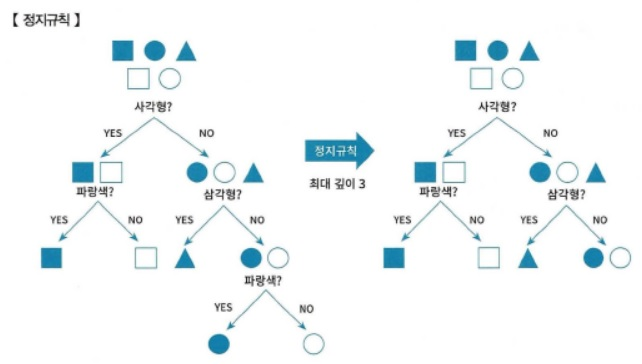

## 4) 의사결정나무의 불순도 계산 알고리즘

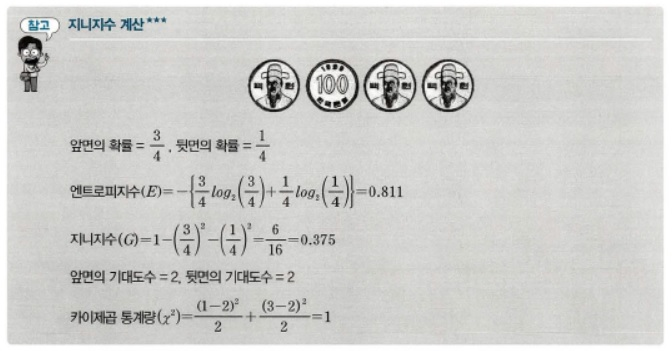

### 꼭 기억해야 하는 지니지수 계산법 **

## 5) 의사결정나무 분석

In [ ]:
# 붓꽃 데이터 로드 후 train과 test로 분리
index<-sample(1:2,150,replace=T,prob=c(0.7,0.3))
train<-iris[index==1,]
test<-iris[index==2,]

In [ ]:
head(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa


In [ ]:
head(test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,5.4,3.9,1.7,0.4,setosa
11,5.4,3.7,1.5,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
17,5.4,3.9,1.3,0.4,setosa
25,4.8,3.4,1.9,0.2,setosa
27,5.0,3.4,1.6,0.4,setosa


In [ ]:
# 의사결정나무 구축
install.packages('rpart')
library(rpart)
result<-rpart(data=train,Species~.)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



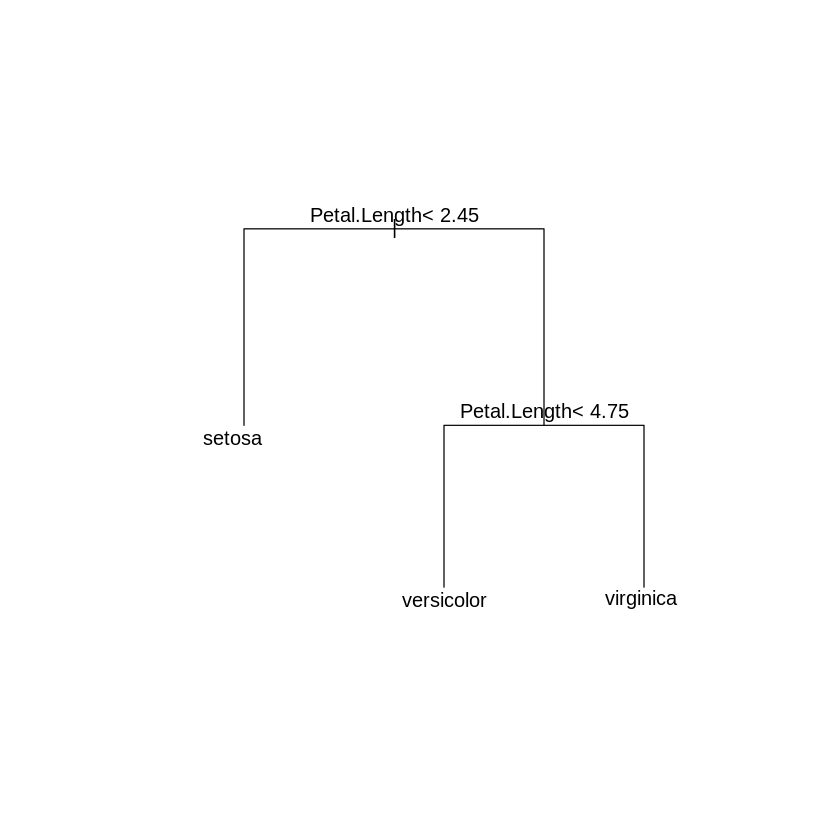

In [ ]:
# 시각화
plot(result,margin=0.3)
text(result)

In [ ]:
# 모형 평가
pred<-predict(result,newdata=test,type='class')
table(test$Species,pred)

            pred
             setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         16         2
  virginica       0          1        13

In [ ]:
result

n= 102 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 102 66 virginica (0.3333333 0.3137255 0.3529412)  
  2) Petal.Length< 2.45 34  0 setosa (1.0000000 0.0000000 0.0000000) *
  3) Petal.Length>=2.45 68 32 virginica (0.0000000 0.4705882 0.5294118)  
    6) Petal.Length< 4.75 28  0 versicolor (0.0000000 1.0000000 0.0000000) *
    7) Petal.Length>=4.75 40  4 virginica (0.0000000 0.1000000 0.9000000) *

* 102개로 구성된 train 데이터셋
* 1번은 뿌리마디로 102개 중 66개의 virginica를 보유하고 있다.
* 2번과 3번은 l번 뿌리마디의 자식마디다.
* 2번은 34개의 setosa 중 0개가 잘못 분류되었음을 의미한다.
* ’ * ’ 표시는 자식마디가 없음을 의미 ， 따라서 2번 노드는 끝마디다.
* 3번은 68개의 virginica 중 32개가 잘못 분류되었음을 의미한다.
* 6번과 7 번은 3번의 자식마디다
* 6번은 28개의 versicolor 중 0개가 잘못 분류되었음을 의미한다#
* 7번은 40개의 virginica 중 4개가 잘못 분류되었음을 의미한다.
* 괄호 안의 숫자는 (setosa, versicolor, virginica)의 비율을 가리킨다.